<a href="https://colab.research.google.com/github/OIEIEIO/Q-bits/blob/main/qiskit_ibm_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.9 MB/s 
     |████████████████████████████████| 19.2 MB 40.3 MB/s 
     |████████████████████████████████| 240 kB 37.8 MB/s 
     |████████████████████████████████| 112 kB 7.7 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 943 kB 47.0 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 4.0 MB 42.4 MB/s 
     |████████████████████████████████| 1.9 MB 38.3 MB/s 
     |████████████████████████████████| 112 kB 55.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=ae9dc592f887ca386728f28739ebf5d6bed22e6fdbce2d5a6bd5c3365b453015
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/25714

In [2]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.5 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=bcea4517e6638342ff59845c4022438a3ed01ebcb97ab8ba6c456a40318ab436
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
from qiskit import IBMQ
IBMQ.save_account('bee8ef567d4a5632d4d260740145532ad')

In [4]:
from qiskit import IBMQ

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

In [5]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
backends = provider.backends()

In [7]:
provider_2 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [8]:
my_provider = IBMQ.get_provider()
my_provider.backends()
my_provider.get_backend('ibmq_qasm_simulator')

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>



---



---



In [9]:
# Import Qiskit
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3)
# Create a Classical Register with 3 bits.
c = ClassicalRegister(3)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
qc.cx(q[0], q[2])

# Add a Measure gate to see the state.
qc.measure(q, c)

# draw the circuit
qc.draw()
#qc.draw('mpl')

ibmqfactory.load_account:WARNING:2022-10-20 19:05:14,502: Credentials are already in use. The existing account in the session will be replaced.


┌───┐             ┌─┐   
q0_0: ┤ H ├──■────■─────┤M├───
      └───┘┌─┴─┐  │  ┌─┐└╥┘   
q0_1: ─────┤ X ├──┼──┤M├─╫────
           └───┘┌─┴─┐└╥┘ ║ ┌─┐
q0_2: ──────────┤ X ├─╫──╫─┤M├
                └───┘ ║  ║ └╥┘
c0_0: ════════════════╬══╩══╬═
                      ║     ║ 
c0_1: ════════════════╩═════╬═
                            ║ 
c0_2: ══════════════════════╩═

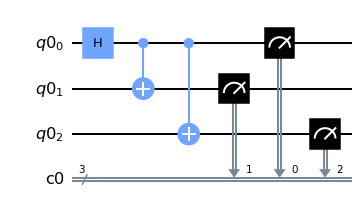

In [10]:
qc.draw('mpl')



---



---



In [11]:
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]


In [12]:
# Compile and run the Quantum circuit on a simulator backend
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

# Show the results
print("simulation: ", result_sim)
print(result_sim.get_counts(qc))

simulation:  Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='9d0d4c48-408d-4db7-9964-d4d585d74ce8', job_id='ed3b0a8a-d60b-4658-853b-5e4b421ca110', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 517, '0x7': 507}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2]], creg_sizes=[['c0', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-85', qreg_sizes=[['q0', 3]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2]]), status=DONE, seed_simulator=681992940, metadata={'parallel_state_update': 2, 'sample_measure_time': 0.000737271, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 3, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'input_qubit_map': [[2, 2], [0, 0], [1, 1]], 'fusion': {'enabled': False}}, time_taken=

In [13]:
#get first device from provider
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

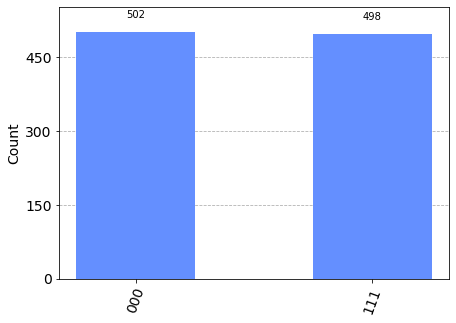

In [14]:
#run GHZ on real device

# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3)
# Create a Classical Register with 3 bits.
c = ClassicalRegister(3)
# Create a Quantum Circuit
ghz = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition.
ghz.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
ghz.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
ghz.cx(q[0], q[2])

#add measurement
ghz.measure(q, c)

#get the backend
backend_real = provider.get_backend("ibmq_qasm_simulator")

#run the job
job_real = execute(ghz, backend_real, shots=1000)

#get results and print
results = job_real.result()
#print(results)

#plot results
from qiskit.visualization import plot_histogram
plot_histogram(results.get_counts())


In [15]:
# # Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(qc, backend=backend, shots=1024)

job_monitor(job, interval = 2)

Job Status: job has successfully run


In [16]:
# Compile and run the Quantum Program on a real device backend
try:
    from qiskit.tools.jupyter import *
    %qiskit_version_table
    %qiskit_backend_overview
   
except ImportError:
    print("Notebook not running in Jupyter")

In [17]:
# import Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer, IBMQ

# import basic plot tools
from qiskit.visualization import plot_histogram

# standard library imports
import random
from time import time

# we will run this function multiple times so let's create it once and for all
def measure_and_plot(circuit):
    """
    This function executes the given circuit on the local simulator
    and plots the obtained result.
    """
    # Use Aer's qasm_simulator
    simulator = BasicAer.get_backend('qasm_simulator')
    
    # Execute and get counts
    result = execute(circuit, simulator).result()
    counts = result.get_counts(circuit)
    
    # Print the results
    print("simulation: \n{}".format(counts))
    # Plot a histogram
    plot_histogram(counts)

# we can now create quantum circuits
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# and add gates
qc.h(qr)
qc.x(qr[0])
qc.barrier()
qc.measure(qr, cr)

# draw the circuit
qc.draw()

┌───┐┌───┐ ░ ┌─┐      
q11_0: ┤ H ├┤ X ├─░─┤M├──────
       ├───┤└───┘ ░ └╥┘┌─┐   
q11_1: ┤ H ├──────░──╫─┤M├───
       ├───┤      ░  ║ └╥┘┌─┐
q11_2: ┤ H ├──────░──╫──╫─┤M├
       └───┘      ░  ║  ║ └╥┘
 c2_0: ══════════════╩══╬══╬═
                        ║  ║ 
 c2_1: ═════════════════╩══╬═
                           ║ 
 c2_2: ════════════════════╩═

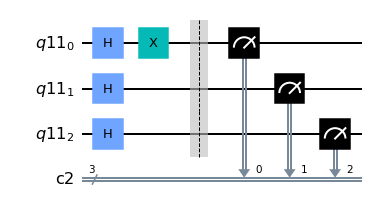

In [18]:
qc.draw('mpl')

In [19]:
# run the circuit and display the results
measure_and_plot(qc)

simulation: 
{'011': 131, '111': 125, '010': 132, '100': 132, '000': 127, '110': 118, '101': 126, '001': 133}


In [20]:
# print the circuit to a text file
qasm = qc.qasm()
with open("qasm.txt", "w") as text_file:
    text_file.write(qasm)

In [21]:
# run the circuit on the quantum processor instead
# load your token from the file "token.txt"
with open("qasm.txt", "r") as text_file:
    token = text_file.readline()
# initialize your API
IBMQ.save_account(token)
IBMQ.load_account()

configrc.store_credentials:WARNING:2022-10-20 19:06:36,635: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-20 19:06:36,924: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
# # Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(qc, backend=backend, shots=1024)

job_monitor(job, interval = 2)

Job Status: job has successfully run




---



---



---



---



In [23]:
# we can also add parameters to our circuit
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# and add gates
qc.h(qr)
qc.x(qr[0])
qc.barrier()
qc.measure(qr, cr)

# draw the circuit
qc.draw()

# and run it multiple times
for i in range(5):
    measure_and_plot(qc)


simulation: 
{'0': 533, '1': 491}
simulation: 
{'1': 543, '0': 481}
simulation: 
{'0': 550, '1': 474}
simulation: 
{'0': 549, '1': 475}
simulation: 
{'1': 509, '0': 515}


In [24]:
# we can even add classical control
qr = QuantumRegister(1)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# and add gates
qc.h(qr)
qc.x(qr[0])
qc.barrier()
qc.measure(qr, cr)

# draw the circuit
qc.draw()

┌───┐┌───┐ ░ ┌─┐┌─┐┌─┐
 q41: ┤ H ├┤ X ├─░─┤M├┤M├┤M├
      └───┘└───┘ ░ └╥┘└╥┘└╥┘
c4_0: ══════════════╩══╬══╬═
                       ║  ║ 
c4_1: ═════════════════╩══╬═
                          ║ 
c4_2: ════════════════════╩═

In [25]:
# we can also use our own random number generator
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# and add gates
qc.h(qr)
qc.x(qr[0])
qc.barrier()
qc.measure(qr, cr)

# draw the circuit
qc.draw()

┌───┐┌───┐ ░ ┌─┐
q42: ┤ H ├┤ X ├─░─┤M├
     └───┘└───┘ ░ └╥┘
 c5: ══════════════╩═

In [26]:
# and run it multiple times
for i in range(5):
    measure_and_plot(qc)

simulation: 
{'1': 559, '0': 465}
simulation: 
{'0': 498, '1': 526}
simulation: 
{'1': 496, '0': 528}
simulation: 
{'0': 508, '1': 516}
simulation: 
{'0': 521, '1': 503}


In [27]:
# and run it multiple times
for i in range(5):
    measure_and_plot(qc)

simulation: 
{'1': 501, '0': 523}
simulation: 
{'1': 519, '0': 505}
simulation: 
{'1': 488, '0': 536}
simulation: 
{'0': 518, '1': 506}
simulation: 
{'0': 500, '1': 524}




---



---



In [30]:
### you can use yor text editor
### to change the code in this cell
### as you like
### and re-execute the cell
### to observe what happens

# create a new quantum circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# add some gates to the circuit
qc.h(qr)

# draw the circuit
qc.draw()

┌───┐
q83_0: ┤ H ├
       ├───┤
q83_1: ┤ H ├
       └───┘
 c6_0: ═════
            
 c6_1: ═════

In [31]:
# run the circuit and display the results
measure_and_plot(qc)

simulation: 
{'00': 1024}


In [32]:
# create a new quantum circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# add some gates to the circuit
qc.h(qr)
qc.x(qr)
qc.measure(qr, cr)

# draw the circuit
qc.draw()

┌───┐┌───┐┌─┐   
q85_0: ┤ H ├┤ X ├┤M├───
       ├───┤├───┤└╥┘┌─┐
q85_1: ┤ H ├┤ X ├─╫─┤M├
       └───┘└───┘ ║ └╥┘
 c7_0: ═══════════╩══╬═
                     ║ 
 c7_1: ══════════════╩═

In [33]:
# run the circuit and display the results
measure_and_plot(qc)

simulation: 
{'01': 241, '00': 260, '11': 236, '10': 287}


In [34]:
# create a new quantum circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# add some gates to the circuit
qc.h(qr[0])
qc.h(qr[1])
qc.measure(qr, cr)

# draw the circuit
qc.draw()

┌───┐┌─┐   
q89_0: ┤ H ├┤M├───
       ├───┤└╥┘┌─┐
q89_1: ┤ H ├─╫─┤M├
       └───┘ ║ └╥┘
 c8_0: ══════╩══╬═
                ║ 
 c8_1: ═════════╩═

In [35]:

# run the circuit and display the results
measure_and_plot(qc)

simulation: 
{'00': 274, '10': 251, '11': 241, '01': 258}


In [36]:
# create a new quantum circuit
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

# add some gates to the circuit
qc.h(qr)
qc.measure(qr, cr)

# draw the circuit
qc.draw()

┌───┐┌─┐
q92: ┤ H ├┤M├
     └───┘└╥┘
 c9: ══════╩═

In [37]:
# run the circuit and display the results
measure_and_plot(qc)

simulation: 
{'0': 528, '1': 496}


In [38]:
# The following code uses a random decider to choose a circuit to be created
# run it once and observe what happens
# what does it do? can you understand each operation?
# do you think that the quantum circuit created is correct?
f = random.randint(1,3)
if f == 1:
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)
    qc.measure(qr, cr)
    qc.draw()

qc.draw()

┌───┐┌─┐
q92: ┤ H ├┤M├
     └───┘└╥┘
 c9: ══════╩═

In [39]:
if f == 2:
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.x(qr[1])
    qc.measure(qr, cr)
    qc.draw()
    
qc.draw()

┌───┐┌─┐   
q95_0: ┤ H ├┤M├───
       ├───┤└╥┘┌─┐
q95_1: ┤ X ├─╫─┤M├
       └───┘ ║ └╥┘
c10_0: ══════╩══╬═
                ║ 
c10_1: ═════════╩═

In [40]:
if f == 3:
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)
    qc.measure(qr, cr)
    qc.draw()

qc.draw()

┌───┐┌─┐   
q95_0: ┤ H ├┤M├───
       ├───┤└╥┘┌─┐
q95_1: ┤ X ├─╫─┤M├
       └───┘ ║ └╥┘
c10_0: ══════╩══╬═
                ║ 
c10_1: ═════════╩═

In [41]:
# The following code uses a random decider to choose a circuit to be created
# run it once and observe what happens
# what does it do? can you understand each operation?
# do you think that the quantum circuit created is correct?
f = random.randint(1,3)
if f == 1:
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)
    qc.measure(qr, cr)
    qc.draw()
if f == 2:
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.x(qr[1])
    qc.measure(qr, cr)
    qc.draw()
if f == 3:
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)
    qc.measure(qr, cr)
    qc.draw()

In [42]:
# run the circuit and display the results
measure_and_plot(qc)

simulation: 
{'1': 485, '0': 539}


In [43]:
# # Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
from qiskit import IBMQ

provider = IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational==True)
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-10-20 19:08:09,247: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  [<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]




---



---



---



---



In [45]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

# Build the circuit
get_ipython().run_line_magic('matplotlib', 'inline')
n = 5
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q, c)

# Circuit to prepare the state |+>⊗|+>⊗|+>⊗|+>:
for j in range(n-1):
    qc.h(q[j])
qc.x(q[1])
qc.barrier()
qc.h(q[1])
qc.x(q[2])
qc.barrier()
qc.h(q[2])
qc.x(q[3])
qc.barrier()
qc.h(q[3])

# CNOTs gates
qc.h(q[0])
qc.cx(q[0],q[1])
qc.barrier()
qc.cx(q[0],q[2])
qc.barrier()
qc.cx(q[0],q[3])
qc.barrier()
qc.h(q[0])

qc.cx(q[3],q[4])

qc.draw()

┌───┐      ░       ░       ░ ┌───┐      ░       ░       ░ ┌───┐
q99_0: ┤ H ├──────░───────░───────░─┤ H ├──■───░───■───░───■───░─┤ H ├
       ├───┤┌───┐ ░ ┌───┐ ░       ░ └───┘┌─┴─┐ ░   │   ░   │   ░ └───┘
q99_1: ┤ H ├┤ X ├─░─┤ H ├─░───────░──────┤ X ├─░───┼───░───┼───░──────
       ├───┤└───┘ ░ ├───┤ ░ ┌───┐ ░      └───┘ ░ ┌─┴─┐ ░   │   ░      
q99_2: ┤ H ├──────░─┤ X ├─░─┤ H ├─░────────────░─┤ X ├─░───┼───░──────
       ├───┤      ░ └───┘ ░ ├───┤ ░ ┌───┐      ░ └───┘ ░ ┌─┴─┐ ░      
q99_3: ┤ H ├──────░───────░─┤ X ├─░─┤ H ├──────░───────░─┤ X ├─░───■──
       └───┘      ░       ░ └───┘ ░ └───┘      ░       ░ └───┘ ░ ┌─┴─┐
q99_4: ───────────░───────░───────░────────────░───────░───────░─┤ X ├
                  ░       ░       ░            ░       ░       ░ └───┘
c12_0: ═══════════════════════════════════════════════════════════════
                                                                      
c12_1: ═══════════════════════════════════════════════════════════════
                                                                      
c12_2: ═══════════════════════════════════════════════════════════════
                                                                      
c12_3: ═══════════════════════════════════════════════════════════════
                                                                      
c12_4: ═══════════════════════════════════════════════════════════════

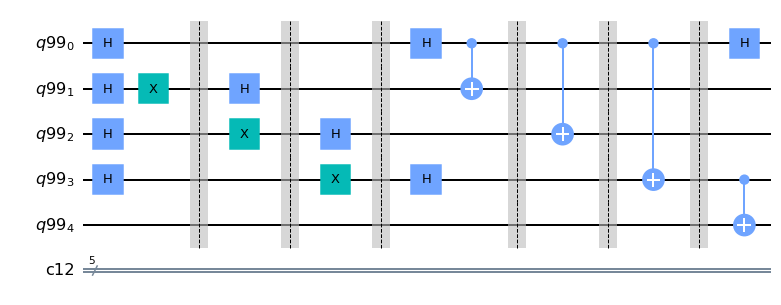

In [46]:
qc.draw('mpl')

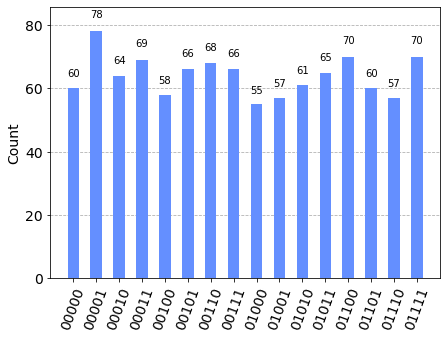

In [47]:
# Create the GHZ state |+>⊗|+>⊗|+>⊗|+>⊗:
from qiskit.tools.visualization import plot_histogram


# In[379]:


q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)
for j in range(4):
    qc.h(q[j])
qc.cx(q[3],q[4])

for j in range(4):
    qc.measure(q[j],c[j])
    
#qc.draw(output='mpl')


# In[380]:


backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()


# In[381]:


plot_histogram(answer)

quantum processor: 
{'00000': 254, '00001': 247, '00010': 228, '00011': 233, '00100': 285, '00101': 238, '00110': 234, '00111': 247, '01000': 241, '01001': 259, '01010': 275, '01011': 272, '01100': 256, '01101': 256, '01110': 231, '01111': 244}


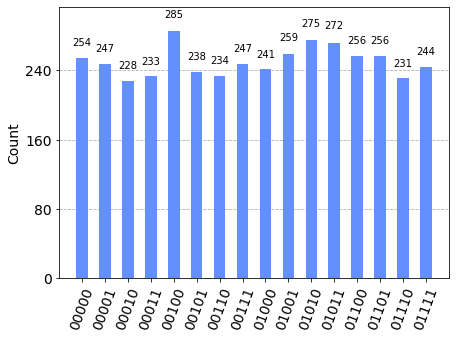

In [48]:
# get the provider
provider = IBMQ.get_provider('ibm-q')

# choose a backend
backend = provider.get_backend('ibmq_qasm_simulator')

# run the circuit on the quantum processor instead
result = execute(qc, backend).result()

# get the result
counts = result.get_counts(qc)

print("quantum processor: \n{}".format(counts))
plot_histogram(counts)